In [33]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Regression Models considered
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Pipeline to ensure no mising of train and test data
from sklearn.pipeline import Pipeline

# # Cross Validation
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

# # Regression Metrics
from sklearn.metrics import r2_score

#visualisations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D

# # saving trained model with pickle
import pickle

# selecting common working idrectory to allow use of pre_processing.py
import os
os.chdir('/Users/DE7/Desktop/LearningPython/XYZ-Corp')
# bespoke cleaning and data_split functions
from pre_processing import pre_processing, data_split

# Set seed for reproducibility
sd = 44

# return current time to track runs for fitting models
from datetime import datetime
def current_time():
    now = datetime.now()
    return now.strftime("%H:%M:%S")

In [34]:
# Loading the data - with cleaned and pre-processed features for decision tree based classifiers
clean_data, feature_list = pre_processing('data/XYZCorp_LendingData.txt')


In [35]:
# Splitting the data and oversampling the training data set
X_train, X_test, y_train, y_test = data_split(clean_data, feature_list, problem = 'regression')

### Creating a pipeline for scaling
Makes sure scaling is independent of test dataset

In [36]:
# Numerical features to be scalled for lasso regression.
scaled_features = ['loan_amnt','funded_amnt','funded_amnt_inv','installment', 'annual_inc', 'dti', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal','revol_util','total_acc', 'out_prncp','out_prncp_inv','total_pymnt' ,'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'months_since_last_credit_pull', 'months_since_earliest_cr_line',
       'emp_length']

# Scalining numerical fuetures
scaler = ColumnTransformer( transformers=[('scaler', StandardScaler(), scaled_features)], remainder='passthrough')

# Initializing Lasso Regressor
lasso = Lasso(random_state=sd, max_iter=20000)

# Creating pipeline
pipeline = Pipeline([('preprocessor', scaler), ('lasso', lasso)])

### Training Lasso Linear Regression Model

In [9]:
# Setting up cross-validation object
alphas = [0.001,0.005] + list(np.linspace(0,0.4,41))
parameteres = {'lasso__alpha':alphas}
lasso_grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5, n_jobs=-1)

lasso_grid.fit(X_train, y_train)

lasso_grid.best_params_

In [19]:
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.989583 (0.000172) with: {'lasso__alpha': 0.001}
0.989583 (0.000172) with: {'lasso__alpha': 0.005}
0.989583 (0.000172) with: {'lasso__alpha': 0.0}
0.989583 (0.000172) with: {'lasso__alpha': 0.01}
0.989583 (0.000171) with: {'lasso__alpha': 0.02}
0.989583 (0.000171) with: {'lasso__alpha': 0.03}
0.989583 (0.000171) with: {'lasso__alpha': 0.04}
0.989583 (0.000171) with: {'lasso__alpha': 0.05}
0.989583 (0.000171) with: {'lasso__alpha': 0.06}
0.989583 (0.000171) with: {'lasso__alpha': 0.07}
0.989583 (0.000171) with: {'lasso__alpha': 0.08}
0.989583 (0.000171) with: {'lasso__alpha': 0.09}
0.989583 (0.000171) with: {'lasso__alpha': 0.1}
0.989583 (0.000171) with: {'lasso__alpha': 0.11}
0.989582 (0.000171) with: {'lasso__alpha': 0.12}
0.989582 (0.000171) with: {'lasso__alpha': 0.13}
0.989582 (0.000171) with: {'lasso__alpha': 0.14}
0.989582 (0.000171) with: {'lasso__alpha': 0.15}
0.989582 (0.000171) with: {'lasso__alpha': 0.16}
0.989582 (0.000171) with: {'lasso__alpha': 0.17}
0.989582 (0.000171) 

* Lasso regularization shown little to no effect on the linear regression model. 
* selecting an arbitrary value of 0.1 for Alpha to see which features become dominant and which shrink to 0

In [37]:
lasso = Lasso(random_state=sd, max_iter=20000, alpha = 0.1)
best_lasso = pipeline = Pipeline([('preprocessor', scaler), ('lasso', lasso)])
best_lasso.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'installment', 'annual_inc',
                                                   'dti',
                                                   'mths_since_last_delinq',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc', 'out_prncp',
                                                   'out_prncp_inv',
                                                   'total_pymnt',
                                                   'total_pymnt_inv',
                                                   'total_rec_prncp',
                                                   'total_rec_int',
                                                   'last_pymnt_amnt',
                                                   'tot_coll_amt',
                                                   'tot_cur_bal',
                                                   'total_rev_hi_lim',
                                                   'months_since_last_credit_pull',
                                                   'months_since_earliest_cr_line',
                                                   'emp_length'])])),
                ('lasso', Lasso(alpha=0.1, max_iter=20000, random_state=44))])

In [69]:
y_pred = best_lasso.predict(X_test)
lasso_score = r2_score(y_test,y_pred)
print('r2 value: ',lasso_score)

r2 value:  0.7792377567606077


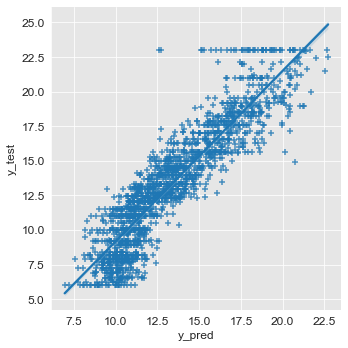

In [66]:
df = pd.DataFrame({'y_pred':y_pred,
                   'y_test':y_test,})
sns.lmplot(x="y_pred", y="y_test", palette="Set1", data=df.sample(frac=0.015,random_state=9), markers = '+')

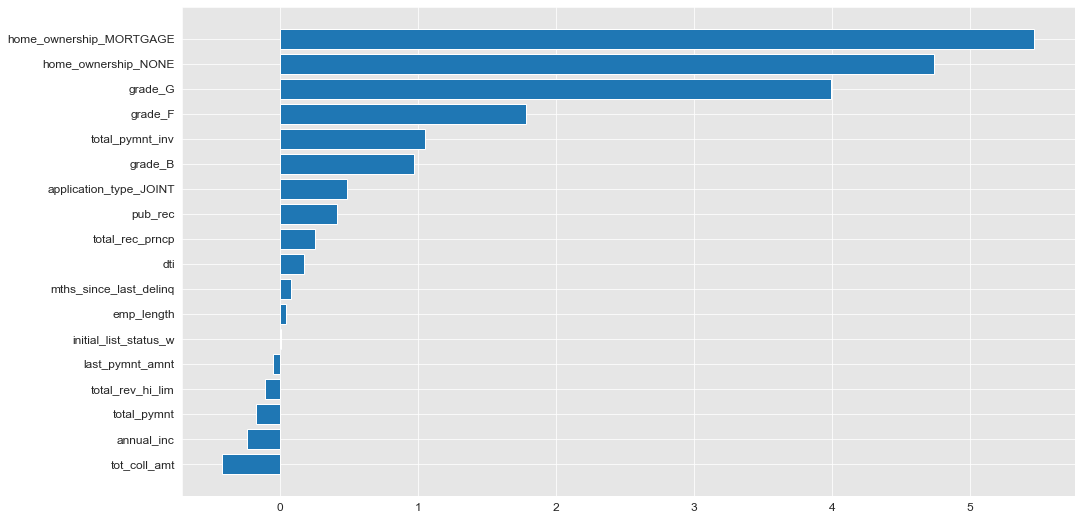

In [82]:
labels = X_train.columns
coef_df = pd.DataFrame({'Feature':X_train.columns,'Coeff':lasso.coef_}).sort_values('Coeff')
coef_df = coef_df[coef_df['Coeff']!=0]
#plotting the all non zero featuresfueatures
plt.figure(figsize=(16,9))
plt.barh(list(range(len(coef_df))),coef_df['Coeff'])
plt.yticks(list(range(len(coef_df))),list(coef_df['Feature']))
plt.show()

### Random Forest Regressor
#### Cross-Validating to tune the model

In [30]:
rfr = RandomForestRegressor(n_jobs = -1, random_state=sd)

params_rf = {'n_estimators': [50, 100, 200, 400, 800],
             'bootstrap': [True, False],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf' : [1, 2, 5, 10],
             'max_depth': [None,5, 10, 20, 30],
             'max_features': ['sqrt', None]}

# Instantiate a 5-fold CV grid search
rfr_grid = RandomizedSearchCV(estimator=rfr, 
                       param_distributions=params_rf,
                       scoring='r2',
                       cv=5,
                       n_jobs=-1,
                       n_iter=40)

# Fit 'grid_dt' to the training data
rfr_grid.fit(X_train, y_train)
best_rfr = rfr_grid.best_estimator_
print('Best Hyperparameter values:\n',rfr_grid.best_params_)
print('Best Random Forest Classifier score:\n',rfr_grid.best_score_)

Best Hyperparameter values:
 {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'bootstrap': True}
Best Random Forest Classifier score:
 0.9845208272274402


* the number of n_estimators is really high - going to investigate furhter the change of perfomance as only number of estimators changes
* same reasoning regading max_depth - will investigate below

In [22]:
train_results = []
test_results = []
list_of_n_estimators = [1,2,4,8,16,32,64,128,200,400]
for n_estimators in list_of_n_estimators:
    rfr = RandomForestRegressor(n_jobs = -1, 
                                random_state=sd, 
                                n_estimators = n_estimators,
                                bootstrap=True,
                                min_samples_split = 5,
                                min_samples_leaf = 2,
                                max_depth = 20,
                                max_features = None)

    rfr.fit(X_train, y_train)
    print('fitted with ', n_estimators, ' at ', current_time())
    train_pred = rfr.predict(X_train)
    y_pred = rfr.predict(X_test)
    
    score_train_data = r2_score(y_train,train_pred)
    score_test_data = r2_score(y_test,y_pred)
    print('train score ',score_train_data,' with estimators: ',n_estimators)
    print('test score ',score_test_data,' with estimators: ',n_estimators)
        
    train_results.append(score_train_data)
    test_results.append(score_test_data)
 

fitted with  1  at  18:28:37
train score  0.9804630568579504  with estimators:  1
test score  0.9669961270042433  with estimators:  1
fitted with  2  at  18:28:46
train score  0.9857306132191901  with estimators:  2
test score  0.9746255831987412  with estimators:  2
fitted with  4  at  18:28:55
train score  0.9881377536576316  with estimators:  4
test score  0.978359497134873  with estimators:  4
fitted with  8  at  18:29:09
train score  0.9893479147993497  with estimators:  8
test score  0.9801829186664898  with estimators:  8
fitted with  16  at  18:29:38
train score  0.9900731527326001  with estimators:  16
test score  0.9811069794724854  with estimators:  16
fitted with  32  at  18:30:34
train score  0.9905495701406083  with estimators:  32
test score  0.9816793193354489  with estimators:  32
fitted with  64  at  18:32:27
train score  0.9907995993970402  with estimators:  64
test score  0.9819836764691839  with estimators:  64
fitted with  128  at  18:36:20
train score  0.99087405

In [31]:
train_results_depth = []
test_results_depth = []
list_depths = [1,2,4,8,12,16,20,25,30,40,50]
for depth in list_depths:
    rfr = RandomForestRegressor(n_jobs = -1, 
                                random_state=sd, 
                                n_estimators = 64,
                                bootstrap=True,
                                min_samples_split = 5,
                                min_samples_leaf = 2,
                                max_depth = depth,
                                max_features = None)

    rfr.fit(X_train, y_train)
    print('fitted with a depth of', depth, ' at ', current_time())
    train_pred = rfr.predict(X_train)
    y_pred = rfr.predict(X_test)
    
    score_train_data = r2_score(y_train,train_pred)
    score_test_data = r2_score(y_test,y_pred)
    print('train score ',score_train_data,' with a tree depth of: ',depth)
    print('test score ',score_test_data,' with a tree depth of: ',depth)
        
    train_results_depth.append(score_train_data)
    test_results_depth.append(score_test_data)
 

fitted with a depth of 1  at  20:07:25
train score  0.2209870720117173  with a tree depth of:  1
test score  0.22085739597115872  with a tree depth of:  1
fitted with a depth of 2  at  20:07:40
train score  0.440878022629832  with a tree depth of:  2
test score  0.4408143583564099  with a tree depth of:  2
fitted with a depth of 4  at  20:08:08
train score  0.7944643497507204  with a tree depth of:  4
test score  0.7941284458807407  with a tree depth of:  4
fitted with a depth of 8  at  20:09:04
train score  0.9420048601188733  with a tree depth of:  8
test score  0.9413349539991998  with a tree depth of:  8
fitted with a depth of 12  at  20:10:24
train score  0.9614226822157601  with a tree depth of:  12
test score  0.9590173013714121  with a tree depth of:  12
fitted with a depth of 16  at  20:12:03
train score  0.9807157427481427  with a tree depth of:  16
test score  0.9752307519852841  with a tree depth of:  16
fitted with a depth of 20  at  20:13:57
train score  0.990799599397040

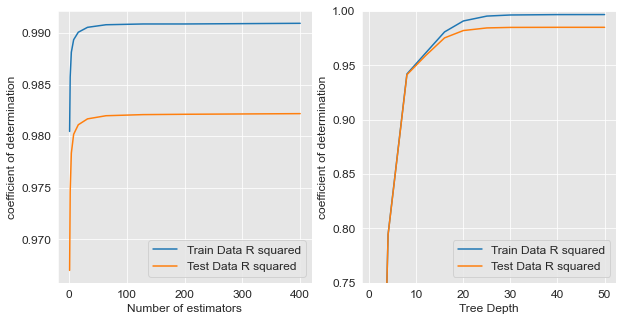

In [83]:
fig = plt.figure(figsize=(10,5))   
plt.rcParams['font.size'] = 12
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

ax1 = fig.add_subplot(121)
line1, = plt.plot(list_of_n_estimators, train_results, label='Train Data R squared')
line2, = plt.plot(list_of_n_estimators, test_results, label='Test Data R squared')
ax1.set_ylabel('coefficient of determination')
ax1.set_xlabel('Number of estimators')
ax1.legend()

ax2 = fig.add_subplot(122)
line1, = plt.plot(list_depths, train_results_depth, label='Train Data R squared')
line2, = plt.plot(list_depths, test_results_depth, label='Test Data R squared')
ax2.set_ylabel('coefficient of determination')
ax2.set_ylim(0.75,1)
ax2.set_xlabel('Tree Depth')
ax2.legend()

plt.show()

* 64 estimators and max depth of 30 look to be the right threshold.
* increasing the parameters further might only lead to overfitting

In [89]:
best_rfr = RandomForestRegressor(n_jobs = -1, 
                        random_state=sd, 
                        n_estimators = 64,
                        bootstrap=True,
                        min_samples_split = 5,
                        min_samples_leaf = 2,
                        max_depth = 30,
                        max_features = None)

param_grid={'max_features': [None]}

# Instantiate a 5-fold CV grid search
rfr_grid = GridSearchCV(estimator=best_rfr, 
                        param_grid = param_grid,
                       scoring='r2',
                       cv=5,
                       n_jobs=-1)

# Fitting and fetching cross-validation mean score
rfr_grid.fit(X_train,y_train)
mean_score = rfr_grid.cv_results_['mean_test_score']

# Extracting the single estimator
best_rfr = rfr_grid.best_estimator_
test_score = best_rfr.score(X_test,y_test)

print('calculating r2 for CV and test data only')
print('Mean CV score  : ',mean_score)
print('Test Data score: ',test_score)


calculating r2 for CV and test data only
Mean CV score  :  [0.98409637]
Test Data score:  0.9852717233234398


In [90]:
y_pred_rf = best_rfr.predict(X_test)

In [143]:
# saved the selected random forest regressor
filename = 'regression_problem/saved_models/random_forest_regressor.sav'
pickle.dump(best_rfr, open(filename, 'wb'))

Idea for business case vizualization. More in a seperate notebook

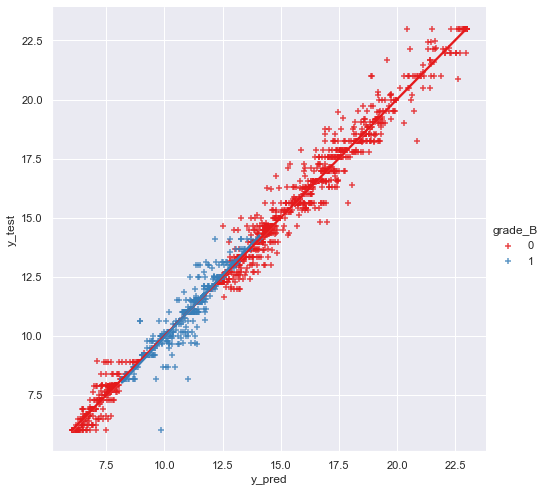

In [138]:
df = pd.DataFrame({'y_pred':y_pred_rf,
                   'y_test':y_test,
                   'grade_B':X_test['grade_B']})


fig = sns.lmplot(x="y_pred", y="y_test", palette="Set1",hue='grade_B', data=df.sample(frac=0.015,random_state=122), markers = '+', height = 7)

In [96]:
best_rfr.score(X_test, y_test)

0.9852717233234398